## Week 7 task by Denis Khryashchev

In [1]:
from mnist import MNIST
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.decomposition import PCA
from pylab import cm as cm
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Loasding the training set
mndata = MNIST('./mnist-data/')
X, labels = mndata.load_training()

# Loading the test set
# X_test, y_test = mndata.load_testing()

In [3]:
# Transforming the data into a numpy array
X = np.asarray(X)

In [4]:
# Dimensions of the MNIST data set
X.shape

(60000L, 784L)

In [5]:
# Looking at 50 dimensions of one digit 
X[0][150:200]

array([  0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247,
       127,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253,
       242, 195,  64,   0,   0,   0,   0,   0,   0,   0,   0])

## Projecting to two dimensions

In [6]:
# Projecting the data to two components maximizing the variance
transformation = PCA(n_components = 2)
two_components = transformation.fit_transform(X)

In [7]:
# Checking how much variance is explained with the first two principal components
print("Variance explained by the first and second components\n", transformation.explained_variance_ratio_)

('Variance explained by the first and second components\n', array([0.09704664, 0.07095924]))


In [8]:
# Projected data
two_components[0]

array([ 123.93241196, -312.65994372])

In [9]:
# Zipping components and labels
labeled_components = zip(two_components, labels)
labeled_components = map(lambda x: list(x[0]) + [x[1]], labeled_components)
labeled_components[0]

[123.93241195796449, -312.65994371867174, 5]

In [10]:
len(labeled_components)

60000

In [11]:
# Function to plot the components and corresponding labels
def plot_components(labeled_components, x_label, y_label, count = 0):
    fig, ax = plt.subplots(figsize = (18, 18))
    colors = ['silver', 'darkblue', 'darkgreen', 'purple', 'maroon', 'teal', 'orange', 'olive', 'black', 'red']
    limit = len(labeled_components)
    if count:
        limit = count
    
    for y in range(10):
        y_points = np.transpose(filter(lambda x: x[-1] == y, labeled_components)[:limit])
        ax.scatter(list(y_points[0]), list(y_points[1]), c = np.full((len(y_points[0])), colors[y]), label = y, alpha = 0.7)
        
    plt.xlabel(x_label, fontsize = 17)
    plt.ylabel(y_label, fontsize = 17)
    ax.legend(fontsize = 22)
    ax.grid(True)

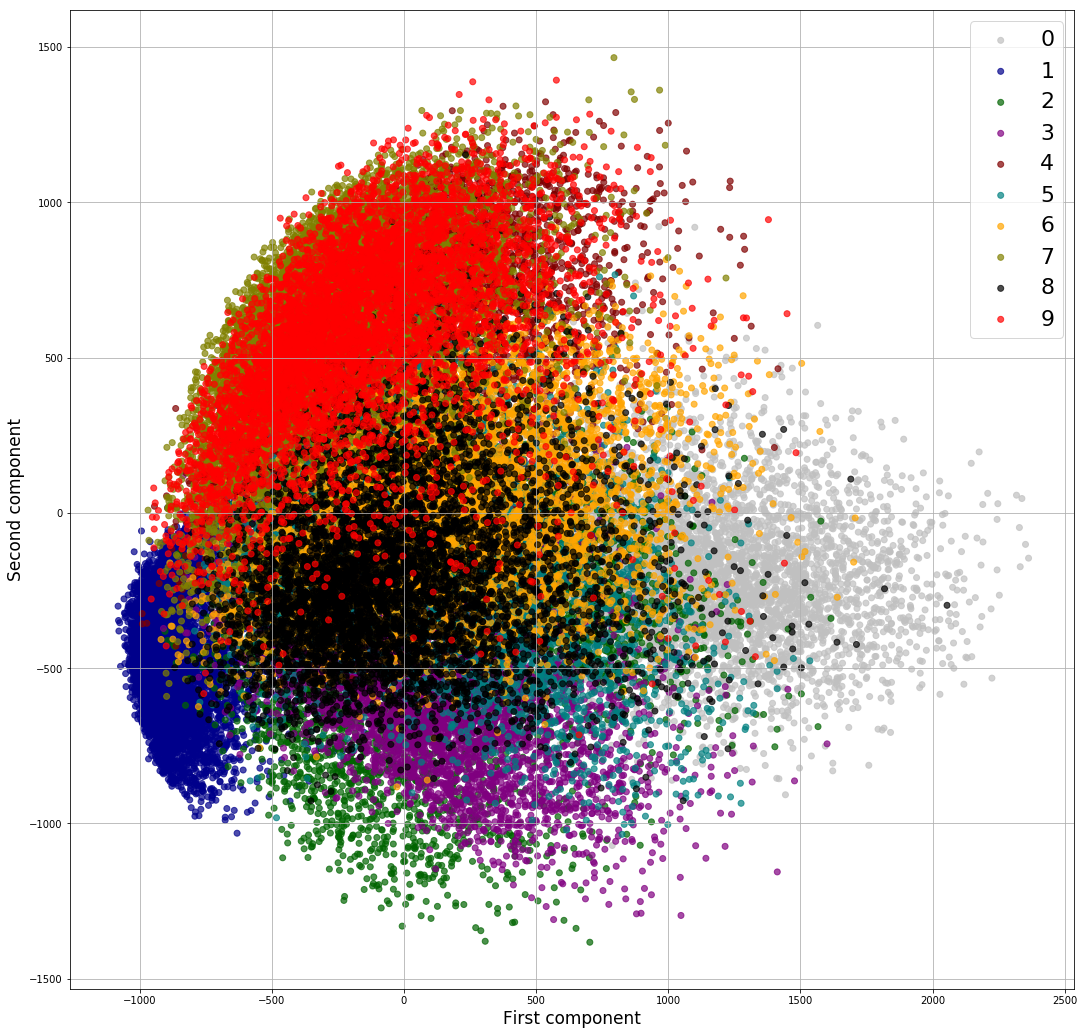

In [12]:
# Plotting everything
plot_components(labeled_components, 'First component', 'Second component')

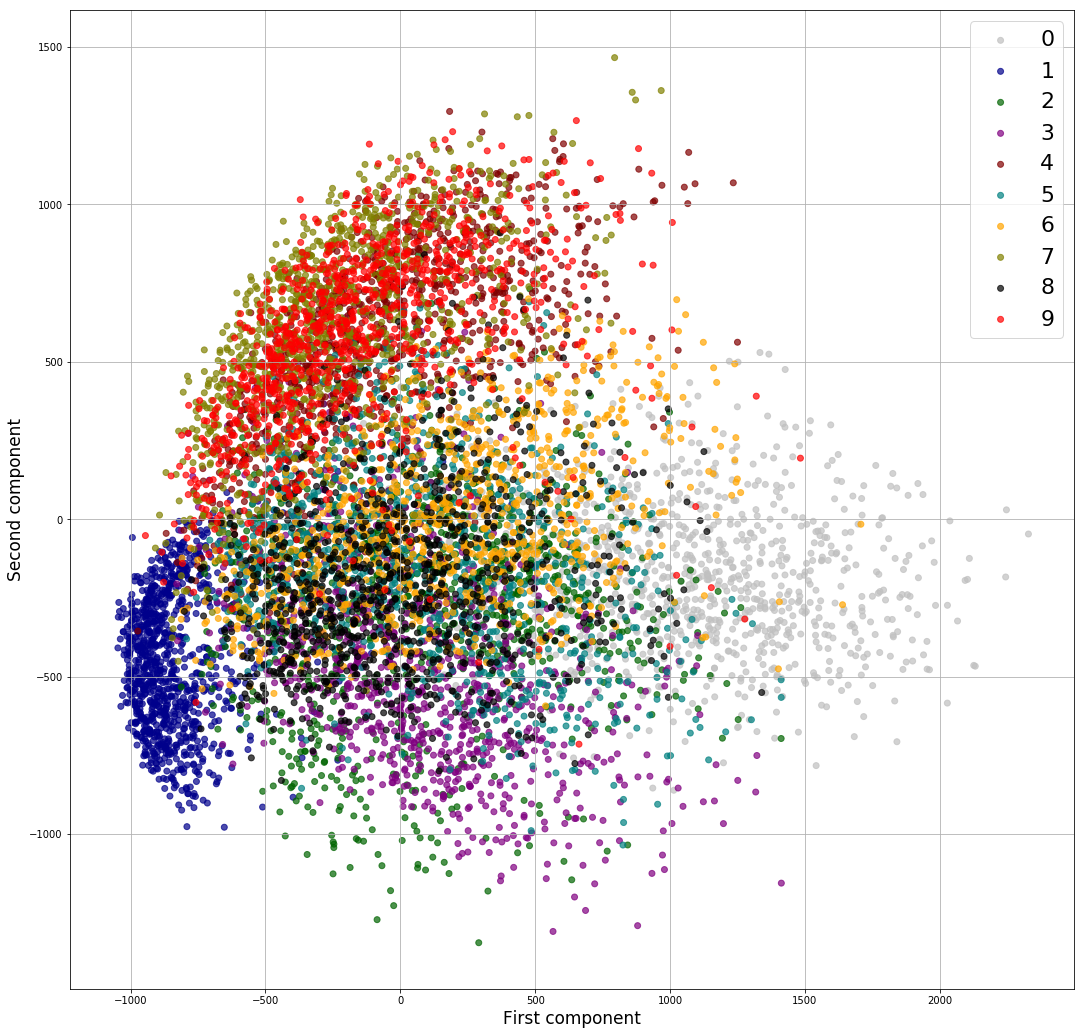

In [13]:
# Plotting just 1000 points to see some details
plot_components(labeled_components, 'First component', 'Second component', 1000)

### First of all, selecting just two principle components out of 784 we covered under 17% of variance which is definitely not enough to perform any model training, clustering on the data and could barely be used for visualizing it.
### Second, looking at the plots one might notice that even after the loss of information contained in over 83% of variance we still can see that the digits '0' and '1' seem to be more or less separable from the rest. While '9' and '7' seem to be almost identical in the projection. Other digits have a very significant overlapping with each other and appear to be inseparable. 

## Optimal number of dimensions

In [14]:
# Projecting the data to two components maximizing the variance
transformation = PCA(n_components = len(X[0]))
n_components = transformation.fit_transform(X)

In [15]:
# Calculating cumulative variance explained by the components
explained = transformation.explained_variance_ratio_.cumsum()

In [16]:
# Function to plot the components and corresponding labels
def plot_variances(variances, x_label, y_label):
    fig, ax = plt.subplots(figsize = (18, 15))
    plot = ax.plot(range(len(variances)), variances, linewidth = 4)
    plt.xlabel(x_label, fontsize = 17)
    plt.ylabel(y_label, fontsize = 17)
    ax.legend(fontsize = 22)
    plt.xticks(range(0, len(variances)+1, 16), rotation = 45)
    ax.grid(True)

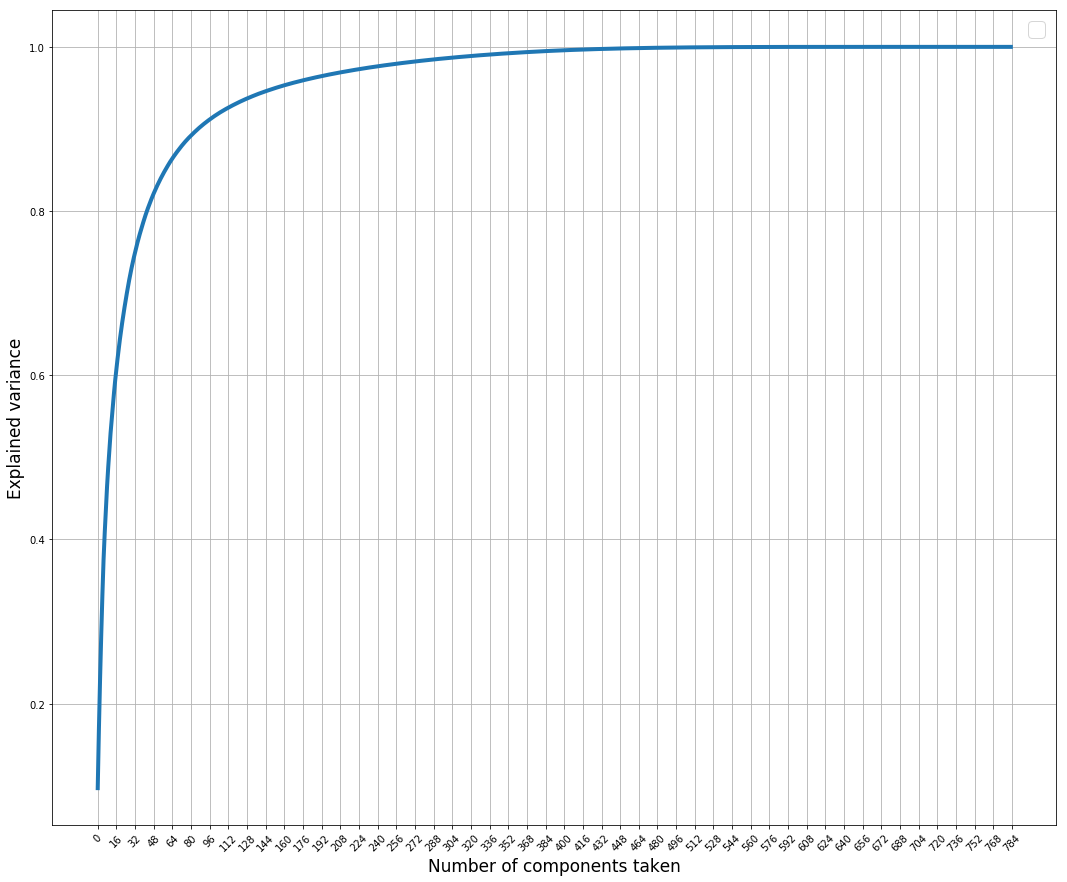

In [17]:
# Plotting the explained variance per number of components
plot_variances(explained, 'Number of components taken', 'Explained variance')

### Looking at the plot it seems to be a reasonable rule of thumb to calculate the first derivative and find how fast the explained variance growth when we add 1 dimension.

In [18]:
# Fitting the 10th degree polynomial
polynomial = np.polyfit(range(len(explained)), explained, 10)
poly = np.poly1d(polynomial)
derivative = poly.deriv()

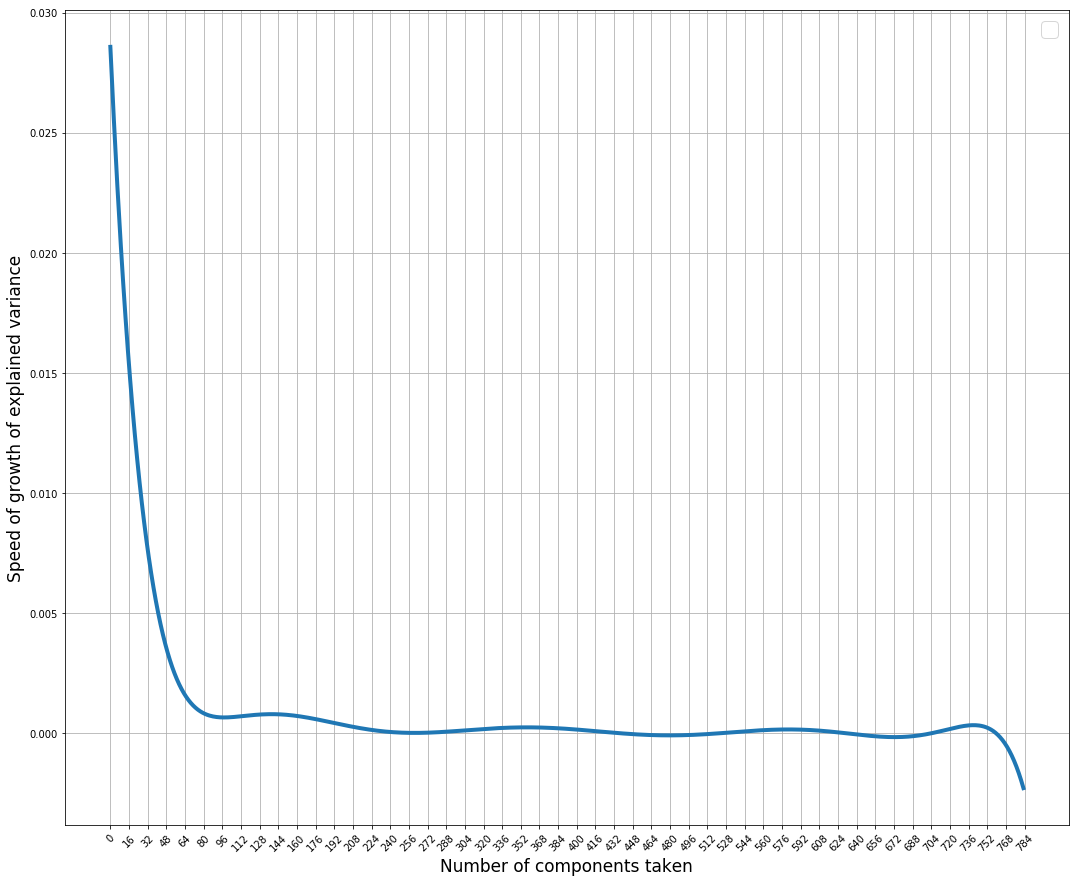

In [19]:
# Plotting the derivative
plot_variances(np.polyval(derivative, np.linspace(0, 784, 784)), 'Number of components taken', 
               'Speed of growth of explained variance')

### Looking at the plot of the derivative I would guess that the optimal number of dimensions is lurking somewhere between 80 and 96.